In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse

In [18]:
df = pd.read_csv('./Steels_kaggle.csv')
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [19]:
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', ' Temperature (°C)']]
Y = df[' 0.2% Proof Stress (MPa)']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

linear = SVR(kernel='linear')
linear.fit(X_train,y_train)

poly = SVR(kernel='poly')
poly.fit(X_train,y_train)

rbf = SVR(kernel='rbf')
rbf.fit(X_train,y_train)

SVR()

In [21]:
mse_test = mse(y_test, linear.predict(X_test), squared=False)
mse_train = mse(y_train, linear.predict(X_train), squared=False)
print("Linear: MSE for test is", mse_test, "and MSE for train is", mse_train)

mse_test = mse(y_test, poly.predict(X_test), squared=False)
mse_train = mse(y_train, poly.predict(X_train), squared=False)
print("Polynomial: MSE for test is", mse_test, "and MSE for train is", mse_train)

mse_test = mse(y_test, rbf.predict(X_test), squared=False)
mse_train = mse(y_train, rbf.predict(X_train), squared=False)
print("RBF: MSE for test is", mse_test, "and MSE for train is", mse_train)

Linear: MSE for test is 85.61993900637825 and MSE for train is 85.8048364912494
Polynomial: MSE for test is 116.89409827868319 and MSE for train is 120.28892125419777
RBF: MSE for test is 121.25347624175846 and MSE for train is 130.35640904403405


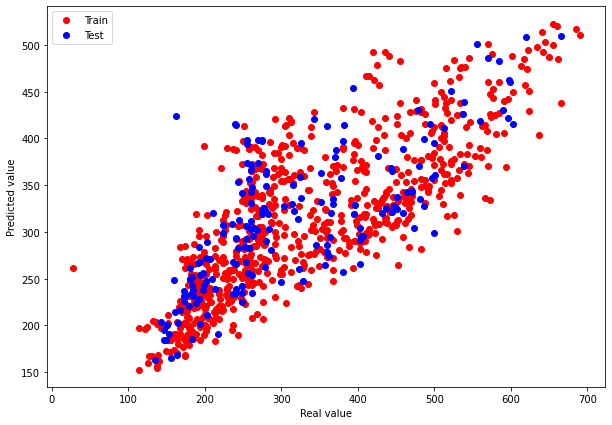

In [22]:
fig = plt.figure(figsize=(10,7))

plt.plot(y_train, linear.predict(X_train), 'or', label='Train')
plt.plot(y_test, linear.predict(X_test), 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

In [23]:
scaler = StandardScaler()
Xsc_train = scaler.fit_transform(X_train)
Xsc_test = scaler.fit_transform(X_test)

In [24]:
linear = SVR(kernel='linear')
linear.fit(Xsc_train,y_train)

poly = SVR(kernel='poly')
poly.fit(Xsc_train,y_train)

rbf = SVR(kernel='rbf')
rbf.fit(Xsc_train,y_train)

SVR()

In [25]:
mse_test = mse(y_test, linear.predict(Xsc_test), squared=False)
mse_train = mse(y_train, linear.predict(Xsc_train), squared=False)
print("Linear: MSE for test is", mse_test, "and MSE for train is", mse_train)

mse_test = mse(y_test, poly.predict(Xsc_test), squared=False)
mse_train = mse(y_train, poly.predict(Xsc_train), squared=False)
print("Polynomial: MSE for test is", mse_test, "and MSE for train is", mse_train)

mse_test = mse(y_test, rbf.predict(Xsc_test), squared=False)
mse_train = mse(y_train, rbf.predict(Xsc_train), squared=False)
print("RBF: MSE for test is", mse_test, "and MSE for train is", mse_train)

Linear: MSE for test is 57.90340070631074 and MSE for train is 56.66486147681243
Polynomial: MSE for test is 90.61619073878957 and MSE for train is 100.484250491961
RBF: MSE for test is 97.3448629203924 and MSE for train is 105.82802150398577


### The result with scaling is better. This can be explained by the formulation of the problem of the SVR algorithm

In [30]:
poly_mse = pd.DataFrame(columns=['degree', 'C', 'coef0', 'mse'])

for degree in range(2, 6):
    print(degree)
    for C in np.linspace(1e-2, 10, 50):
        for coef0 in np.linspace(-1e-1, 1e-1, 20):
            poly = SVR(kernel='poly', C=C, degree=degree, coef0=coef0)
            poly.fit(Xsc_train,y_train)
            new_row = pd.Series({'degree': degree, 'C': C, 'coef0': coef0, 
                                 'mse': mse(y_test, poly.predict(Xsc_test), squared=False)})
            poly_mse = pd.concat([poly_mse, new_row.to_frame().T], ignore_index=True)
            
poly_mse = poly_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
poly_mse

2
3
4
5


,degree,C,coef0,mse
0,2.0,10.0,0.1,51.297239
1,2.0,9.796122,0.1,51.504949
2,2.0,9.592245,0.1,51.750989
3,2.0,9.388367,0.1,51.990972
4,2.0,10.0,0.089474,52.01733
...,...,...,...,...
3995,2.0,9.18449,-0.1,148.526183
3996,2.0,9.388367,-0.1,149.991059
3997,2.0,9.592245,-0.1,151.370782
3998,2.0,9.796122,-0.1,152.776346


In [31]:
poly_mse = pd.DataFrame(columns=['degree', 'C', 'coef0', 'mse'])

for degree in range(1, 3):
    print(degree)
    for C in np.linspace(7, 20, 50):
        for coef0 in np.linspace(1e-1, 10, 20):
            poly = SVR(kernel='poly', C=C, degree=degree, coef0=coef0)
            poly.fit(Xsc_train,y_train)
            new_row = pd.Series({'degree': degree, 'C': C, 'coef0': coef0, 
                                 'mse': mse(y_test, poly.predict(Xsc_test), squared=False)})
            poly_mse = pd.concat([poly_mse, new_row.to_frame().T], ignore_index=True)
            
poly_mse = poly_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
poly_mse

1
2


,degree,C,coef0,mse
0,2.0,20.0,0.621053,44.893531
1,2.0,19.734694,0.621053,44.921951
2,2.0,19.469388,0.621053,44.94705
3,2.0,19.204082,0.621053,44.981032
4,2.0,20.0,1.142105,45.00126
...,...,...,...,...
1995,1.0,7.0,4.268421,58.903681
1996,1.0,7.0,0.1,58.903681
1997,1.0,7.0,2.184211,58.903682
1998,1.0,7.0,0.621053,58.903686


In [32]:
poly_mse = pd.DataFrame(columns=['degree', 'C', 'coef0', 'mse'])

for degree in range(2, 3):
    print(degree)
    for C in np.linspace(20, 100, 50):
        for coef0 in np.linspace(0.5, 0.7, 20):
            poly = SVR(kernel='poly', C=C, degree=degree, coef0=coef0)
            poly.fit(Xsc_train,y_train)
            new_row = pd.Series({'degree': degree, 'C': C, 'coef0': coef0, 
                                 'mse': mse(y_test, poly.predict(Xsc_test), squared=False)})
            poly_mse = pd.concat([poly_mse, new_row.to_frame().T], ignore_index=True)
            
poly_mse = poly_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
poly_mse

2


,degree,C,coef0,mse
0,2.0,93.469388,0.5,43.617961
1,2.0,93.469388,0.510526,43.619355
2,2.0,91.836735,0.5,43.619709
3,2.0,95.102041,0.5,43.619712
4,2.0,91.836735,0.510526,43.620339
...,...,...,...,...
995,2.0,20.0,0.521053,44.904623
996,2.0,20.0,0.668421,44.904794
997,2.0,20.0,0.678947,44.905503
998,2.0,20.0,0.7,44.90592


In [33]:
poly_mse = pd.DataFrame(columns=['degree', 'C', 'coef0', 'mse'])

for degree in range(2, 3):
    print(degree)
    for C in np.linspace(90, 100, 50):
        for coef0 in np.linspace(0.45, 0.55, 20):
            poly = SVR(kernel='poly', C=C, degree=degree, coef0=coef0)
            poly.fit(Xsc_train,y_train)
            new_row = pd.Series({'degree': degree, 'C': C, 'coef0': coef0, 
                                 'mse': mse(y_test, poly.predict(Xsc_test), squared=False)})
            poly_mse = pd.concat([poly_mse, new_row.to_frame().T], ignore_index=True)
            
poly_mse = poly_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
poly_mse

2


,degree,C,coef0,mse
0,2.0,98.979592,0.45,43.562559
1,2.0,98.77551,0.45,43.562903
2,2.0,97.142857,0.45,43.563804
3,2.0,97.346939,0.45,43.563858
4,2.0,98.571429,0.45,43.564795
...,...,...,...,...
995,2.0,99.795918,0.544737,43.705023
996,2.0,99.591837,0.55,43.707331
997,2.0,100.0,0.544737,43.708493
998,2.0,99.795918,0.55,43.711043


### Thus, best parameters for polynomial are degree = 2, C = 93 and coef0 = 0.5

In [41]:
rbf_mse = pd.DataFrame(columns=['gamma', 'C', 'mse'])

for gamma in np.linspace(0.1, 10, 50):
    for C in np.linspace(7, 20, 50):
        rbf = SVR(kernel='rbf', C=C, gamma=gamma)
        rbf.fit(Xsc_train,y_train)
        new_row = pd.Series({'gamma': gamma, 'C': C, 
                             'mse': mse(y_test, rbf.predict(Xsc_test), squared=False)})
        rbf_mse = pd.concat([rbf_mse, new_row.to_frame().T], ignore_index=True)
            
rbf_mse = rbf_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
rbf_mse

,gamma,C,mse
0,0.1,20.0,45.963507
1,0.1,19.734694,46.061277
2,0.1,19.469388,46.158717
3,0.1,19.204082,46.251624
4,0.1,18.938776,46.347831
...,...,...,...
2495,9.797959,7.265306,125.739411
2496,10.0,7.530612,125.743437
2497,9.797959,7.0,125.778206
2498,10.0,7.265306,125.780826


In [43]:
rbf_mse = pd.DataFrame(columns=['gamma', 'C', 'mse'])

for gamma in np.linspace(1e-4, 1e-1, 20):
    for C in np.linspace(50, 100, 50):
        rbf = SVR(kernel='rbf', C=C, gamma=gamma)
        rbf.fit(Xsc_train,y_train)
        new_row = pd.Series({'gamma': gamma, 'C': C, 
                             'mse': mse(y_test, rbf.predict(Xsc_test), squared=False)})
        rbf_mse = pd.concat([rbf_mse, new_row.to_frame().T], ignore_index=True)
            
rbf_mse = rbf_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
rbf_mse

,gamma,C,mse
0,0.1,100.0,38.078313
1,0.1,98.979592,38.10459
2,0.1,97.959184,38.130736
3,0.1,96.938776,38.159246
4,0.1,95.918367,38.189958
...,...,...,...
995,0.0001,54.081633,117.406998
996,0.0001,53.061224,117.580111
997,0.0001,52.040816,117.752339
998,0.0001,51.020408,117.925015


In [44]:
rbf_mse = pd.DataFrame(columns=['gamma', 'C', 'mse'])

for gamma in np.linspace(5e-2, 5e-1, 20):
    for C in np.linspace(100, 200, 50):
        rbf = SVR(kernel='rbf', C=C, gamma=gamma)
        rbf.fit(Xsc_train,y_train)
        new_row = pd.Series({'gamma': gamma, 'C': C, 
                             'mse': mse(y_test, rbf.predict(Xsc_test), squared=False)})
        rbf_mse = pd.concat([rbf_mse, new_row.to_frame().T], ignore_index=True)
            
rbf_mse = rbf_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
rbf_mse

,gamma,C,mse
0,0.263158,200.0,34.559745
1,0.286842,200.0,34.582883
2,0.263158,197.959184,34.596597
3,0.286842,197.959184,34.614797
4,0.215789,200.0,34.635463
...,...,...,...
995,0.05,108.163265,40.866841
996,0.05,106.122449,40.91532
997,0.05,104.081633,40.970687
998,0.05,102.040816,41.021095


In [45]:
rbf_mse = pd.DataFrame(columns=['gamma', 'C', 'mse'])

for gamma in np.linspace(2e-1, 3e-1, 20):
    for C in np.linspace(200, 500, 50):
        rbf = SVR(kernel='rbf', C=C, gamma=gamma)
        rbf.fit(Xsc_train,y_train)
        new_row = pd.Series({'gamma': gamma, 'C': C, 
                             'mse': mse(y_test, rbf.predict(Xsc_test), squared=False)})
        rbf_mse = pd.concat([rbf_mse, new_row.to_frame().T], ignore_index=True)
            
rbf_mse = rbf_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
rbf_mse

,gamma,C,mse
0,0.205263,500.0,31.694116
1,0.210526,500.0,31.725513
2,0.210526,493.877551,31.747937
3,0.205263,493.877551,31.748015
4,0.215789,500.0,31.755363
...,...,...,...
995,0.242105,200.0,34.682606
996,0.226316,200.0,34.691923
997,0.294737,200.0,34.705755
998,0.3,206.122449,34.741852


In [46]:
rbf_mse = pd.DataFrame(columns=['gamma', 'C', 'mse'])

for gamma in np.linspace(1e-1, 3e-1, 20):
    for C in np.linspace(500, 1000, 50):
        rbf = SVR(kernel='rbf', C=C, gamma=gamma)
        rbf.fit(Xsc_train,y_train)
        new_row = pd.Series({'gamma': gamma, 'C': C, 
                             'mse': mse(y_test, rbf.predict(Xsc_test), squared=False)})
        rbf_mse = pd.concat([rbf_mse, new_row.to_frame().T], ignore_index=True)
            
rbf_mse = rbf_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
rbf_mse

,gamma,C,mse
0,0.173684,1000.0,30.915515
1,0.184211,1000.0,30.915799
2,0.184211,989.795918,30.920557
3,0.173684,989.795918,30.927158
4,0.184211,979.591837,30.927638
...,...,...,...
995,0.1,540.816327,33.938758
996,0.1,530.612245,34.018064
997,0.1,520.408163,34.107445
998,0.1,510.204082,34.202713


In [47]:
rbf_mse = pd.DataFrame(columns=['gamma', 'C', 'mse'])

for gamma in np.linspace(1e-1, 2e-1, 20):
    for C in np.linspace(1000, 10000, 50):
        rbf = SVR(kernel='rbf', C=C, gamma=gamma)
        rbf.fit(Xsc_train,y_train)
        new_row = pd.Series({'gamma': gamma, 'C': C, 
                             'mse': mse(y_test, rbf.predict(Xsc_test), squared=False)})
        rbf_mse = pd.concat([rbf_mse, new_row.to_frame().T], ignore_index=True)
            
rbf_mse = rbf_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
rbf_mse

,gamma,C,mse
0,0.147368,4306.122449,30.496194
1,0.152632,3571.428571,30.496425
2,0.147368,4122.44898,30.498418
3,0.152632,3938.77551,30.504889
4,0.152632,3387.755102,30.505376
...,...,...,...
995,0.2,9265.306122,32.774839
996,0.2,9448.979592,32.815014
997,0.2,9632.653061,32.858047
998,0.2,9816.326531,32.895816


### Thus, best parameters for rbf are C = 4306 and gamma = 0.1473

### The best result was obtained with rbf and gave mse equal to 30

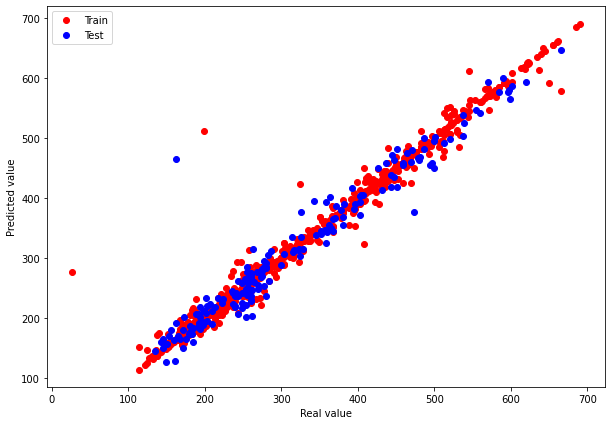

In [48]:
rbf = SVR(kernel='rbf', C=4306, gamma=0.147368)
rbf.fit(Xsc_train,y_train)


fig = plt.figure(figsize=(10,7))

plt.plot(y_train, rbf.predict(Xsc_train), 'or', label='Train')
plt.plot(y_test, rbf.predict(Xsc_test), 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

In [49]:
mse_test = mse(y_test, rbf.predict(Xsc_test), squared=False)
mse_train = mse(y_train, rbf.predict(Xsc_train), squared=False)
print("RBF: MSE for test is", mse_test, "and MSE for train is", mse_train)

RBF: MSE for test is 30.496045588447775 and MSE for train is 19.892550651298148
